In [1]:
#First of all,we are going to import the neccesary modules and load the data in a Dataframe object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


warnings.filterwarnings('ignore')
%matplotlib inline
data=pd.read_csv('Coursework_1_data.csv') 

# Data exploration [10%]:
Conduct exploratory inspection of the dataset to provide a good understanding of
data characteristics
Data exploration refers to when we first review the data.We should try to understand "what is it about?", glimpsing possible patterns and recognizing statistical distributions that may be useful in the future

## Basic exploration

In [5]:
# First look of the data
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
data['BounceRates']

0        0.200000
1        0.000000
2        0.200000
3        0.050000
4        0.020000
           ...   
12325    0.007143
12326    0.000000
12327    0.083333
12328    0.000000
12329    0.000000
Name: BounceRates, Length: 12330, dtype: float64

In [5]:

# Lets take a second closer look at data
(data.shape)
(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

We are dealing with a dataset with 12330 entries for each column,with 18 columns in total.
We are working with a dataset of acceptable size, but not too big (big data) as the capacity of the regular PC (CPU+RAM) can work with it in a reasonable period of time.
Of the 18 columns there are X input features and 1 Y output label "Revenue".
We can see we mainly have numeric int64(7) and float64(7).We also have two object Values for Month and Visitor Type and two bool values for Weekend and Revenue.

                                  Numerical features
                            
* Administrative: Number of pages visited by the visitor about account management
* Administrative duration: Total amount of time ( in seconds) spent by the visitor on account management related pages
* Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site
* Informational duration: Total amount of time ( in seconds) spent by the visitor on informational pages
* Product related: Number of pages visited by visitor about product related pages
* Product related duration: Total amount of time ( in seconds) spent by the visitor on product related pages
* Bounce rate: Average bounce rate value of the pages visited by the visitor
* Exit rate: Average exit rate value of the pages visited by the visitor
* Page value: Average page value of the pages visited by the visitor
* Special day: Closeness of the site visiting time to a special day

     
                                Categorical features
                             
* Operating Systems: Operating system of the visitor
* Browser: Browser of the visitor
* Region Geographic region from which the session has been started by the visitor
* Traffic Type: Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)
* Visitor Type: Visitor type as ‘‘New Visitor,’’ ‘‘Returning Visitor,’’ and ‘‘Other’’.
* Weekend: Boolean value indicating whether the date of the visit is weekend
* Month: Month value of the visit date Target
* Revenue: Class label indicating whether the visit has been finalized with a transaction


There are 8 categorical features(Operating Systems,Browser,Region,Traffic Type,Visitor Type,Weekend,Month and Revenue) and 10 numerical values(Administrative,Administrative Duration,Informational,Informational duration,Product related,Product related duration,Bounce rate,Exit rate,Page value,Special Day) .The definition of each feature is explained in  "Feature description for the dataset of Coursework_1_data.pdf"

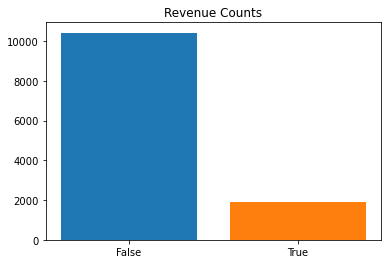

In [6]:
data['Revenue'].value_counts() 
plt.title('Revenue Counts')
plt.bar('False',10422)
plt.bar('True',1908)
plt.show()


We can see how is data distributed in Our target  column  Revenue,There are 5 times more False Values than True Values(10422 vs 1908). We can visualize this information with a simple bar plot:

## Five-number summary and boxplots

In [113]:
(data.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


We can see that Product Related_Duration,Administritative_Duration and Informational_Duration are the features with the biggest standard deviation.
We can take a closer look to this features using box plots :

<AxesSubplot:>

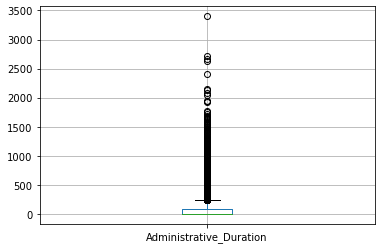

In [114]:
data[['Administrative_Duration']].boxplot()

<AxesSubplot:>

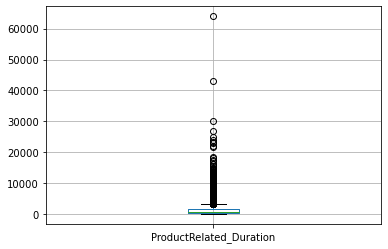

In [115]:
data[['ProductRelated_Duration']].boxplot()

<AxesSubplot:>

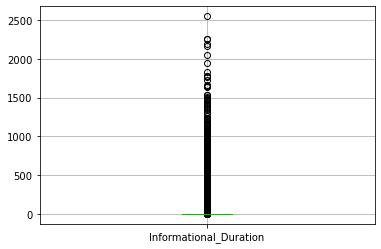

In [116]:
data[['Informational_Duration']].boxplot()

From the boxplots we can see that Informational Duration has the biggest amount of Outliers

## Histograms to study frequency distribution

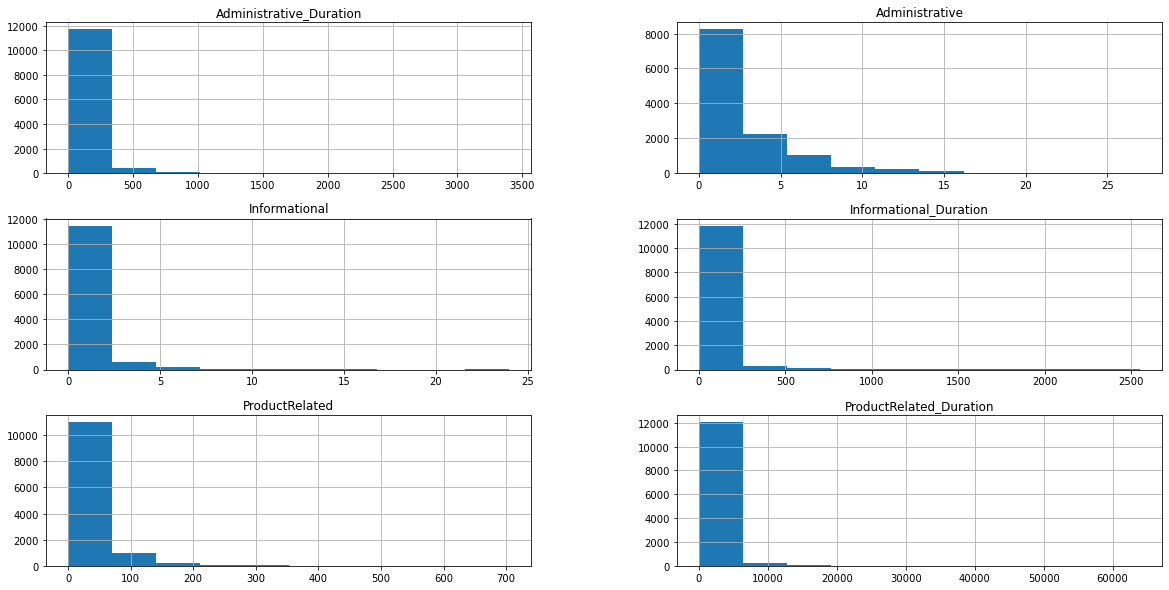

In [117]:
from matplotlib.pyplot import figure
fig=(data[['Administrative_Duration','Administrative','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration']]).hist(figsize=(20, 10))


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

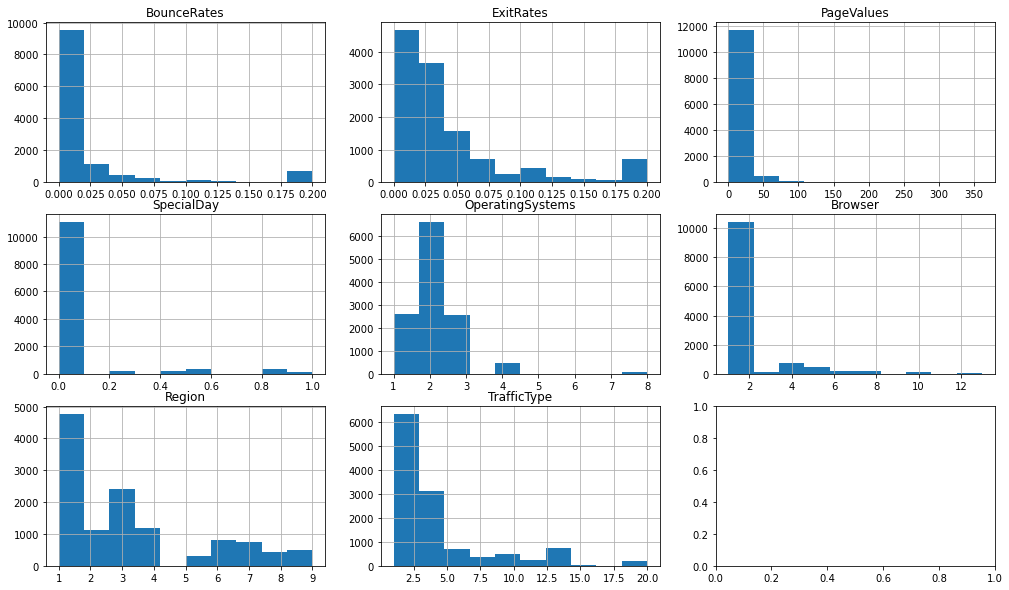

In [118]:
fig=(data[['BounceRates','ExitRates','PageValues','SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','Weekend']]).hist(figsize=(17, 10))


From the the histograms we can see that Exit Rates and Region present the data more distributed than the other features.Other features in which data is distributed are , although in less proportion, : OperatingSystems, Traffic Type and Administrative.

## Correlation matrix and Scatter plots

In order to know the relationship between the Features we will use the correlation between a pair of variables,

This is measure in a range type [-1, 1] where 1 indicates full linear relationship, 0 no linear relationship, -1 negatively linear relationship


In [119]:
corr_matrix = data.corr()
print(corr_matrix)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561         

<AxesSubplot:>

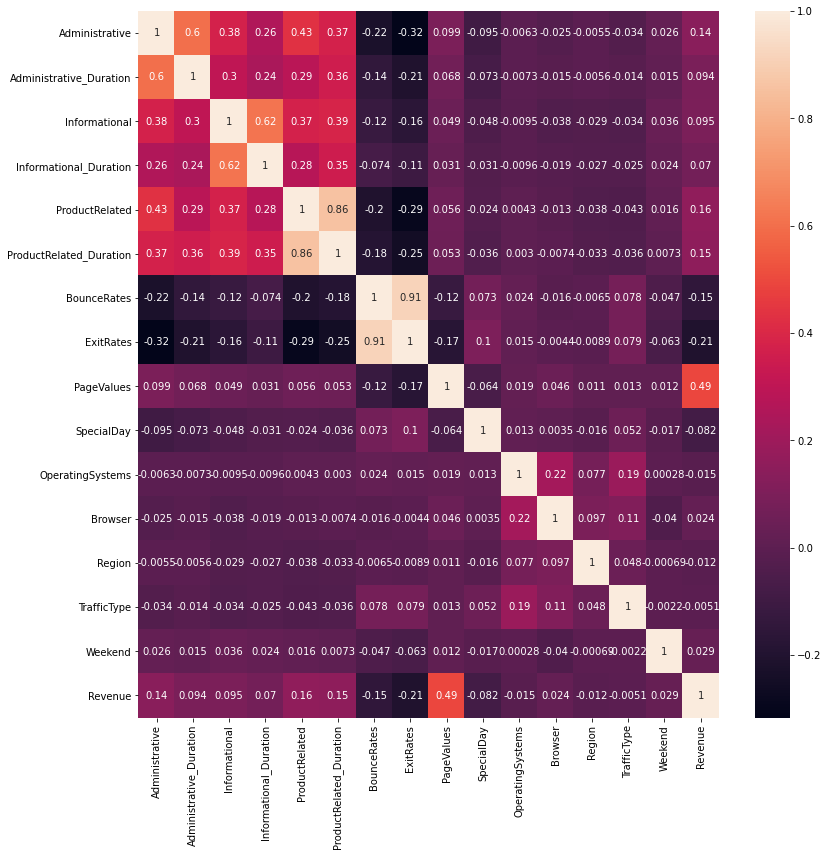

In [120]:
fig, ax = plt.subplots(figsize=(13,13))         # We can visualize this correlation matrix in a heat map
sns.heatmap(data.corr()  ,annot=True,ax=ax)

The analysys show us that there are not Features with a strong  negative linear relationship and most of the Features have no linear relationship

However we have a sighly positive liner relationship between the following features. Where we have order it from highest to lowest ratio,

1. Bounce Rates and Exit Rates
2. ProductRelated and Product Related Duration

And much with a much less relationship we also have:

3. Administrative and Administrative_Duration
4. Informational and Informational Duration


We can use  a scatter plot to visualize each pair of valuables as points in the plane


Text(0.5, 1.0, 'Relationship between BounceRates and Exit Rates')

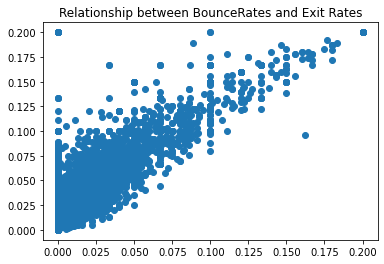

In [121]:
plt.scatter(data['BounceRates'],data['ExitRates'])
plt.title('Relationship between BounceRates and Exit Rates')


Text(0.5, 1.0, 'Relationship  between ProductRelated Duration and Product Related ')

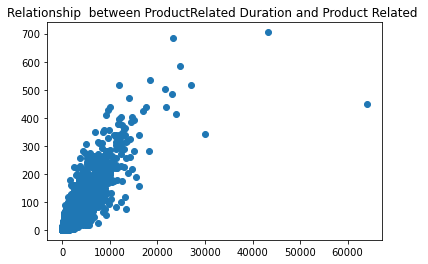

In [122]:
plt.scatter(data['ProductRelated_Duration'],data['ProductRelated'])
plt.title('Relationship  between ProductRelated Duration and Product Related ')

Text(0.5, 1.0, 'Relationship  between Administrative_Duration and Administrative')

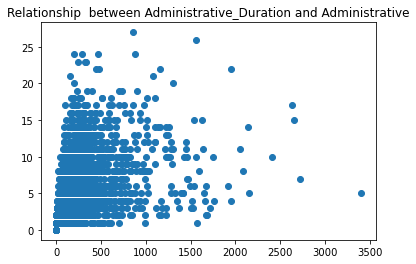

In [123]:
plt.scatter(data['Administrative_Duration'],data['Administrative'])
plt.title('Relationship  between Administrative_Duration and Administrative')

Text(0.5, 1.0, 'Relationship  between Informational and Informational_Duration')

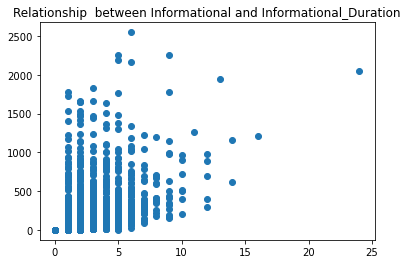

In [124]:
plt.scatter(data['Informational'],data['Informational_Duration'])
plt.title('Relationship  between Informational and Informational_Duration')

# Data pre-processing [30%]:
Carry out well thought pre-processing procedures to prepare the data into a form
that is likely to lead to better performance.
Data preprocessing is a preliminary step during the data mining process. By preprocessing we mean techniques that are performed on the raw data to transform it into data that has formats that are easier to use. We will divide this section into the following points

## Dealing with missing values

In [125]:
data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [126]:
data.isnull().sum() 

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

As we can see from above, there are not missing values within the dataset.Thus,in this particular case no further action is required.

## Encoding categorical features

We need to encode the categorical features Operating Systems,Browser,Region,Traffic Type,Visitor Type,Weekend and Month).We will use two different techniques

In [63]:
onehotenconderfeatures=['VisitorType','Month','Weekend']          #Extract features for one hot encoding
ordinalencoderfeatures=['Region','Browser','OperatingSystems','TrafficType'] #extract features for label encoding

#We will use Pipeline for create the encoders:
onehotenconder= OneHotEncoder(handle_unknown='ignore')
ontehoteencoder_df=pd.DataFrame(onehotenconder.fit_transform(data[['VisitorType','Month','Weekend']]).toarray())
dataencoded= data.join(ontehoteencoder_df)

ordinalencoder=(OrdinalEncoder()).fit(dataencoded[['Region','Browser','OperatingSystems','TrafficType']])
dataencoded[['Region','Browser','OperatingSystems','TrafficType']]=ordinalencoder.transform(dataencoded[['Region','Browser','OperatingSystems','TrafficType']])

dataenc=dataencoded.drop(['VisitorType','Month','Weekend'], axis=1)


Due to One hot encoding the total number of columns has increased from 18 to 30.i.e 12 more columns.

## Data Reduction

In [87]:
#removing data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=dataenc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
Y=dataenc.iloc[:,[14]]

Selectbestfeatures=SelectKBest(score_func=chi2,k=10)

train=Selectbestfeatures.fit(X,Y)
datascores=pd.DataFrame(train.scores_)
datacolumns=pd.DataFrame(X.columns)

Scores_features=pd.concat([datacolumns,datascores],axis=1)
Scores_features.columns=['Features','Score']
print(Scores_features.nlargest(10,'Score'))  #the TOP 10 most important features are:

#getting data more balanced



                   Features          Score
5   ProductRelated_Duration  877404.339415
8                PageValues  175126.808512
1   Administrative_Duration   41754.836841
3    Informational_Duration   35059.775770
4            ProductRelated   19317.285376
0            Administrative    1133.965531
2             Informational     357.981605
24                       10     223.548231
14                        0     115.339482
23                        9      54.997108


## Feature scaling

In [128]:
minMax_scale = MinMaxScaler()   # to default range [0, 1]
dataenc['Administrative_Duration'] = minMax_scale.fit_transform(dataenc[['Administrative_Duration']])
dataenc['Informational_Duration'] = minMax_scale.fit_transform(dataenc[['Informational_Duration']])
dataenc['ProductRelated_Duration'] = minMax_scale.fit_transform(dataenc[['ProductRelated_Duration']])
dataenc['ProductRelated'] = minMax_scale.fit_transform(dataenc[['ProductRelated']])
dataenc['PageValues'] = minMax_scale.fit_transform(dataenc[['PageValues']])

X=dataenc.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]].values
Y=dataenc.iloc[:,[14]].values


X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y,test_size=0.30)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Extra

IF applying data reduction+ combination of oversampling/undersampling:

In [88]:
#getting data more balanced
XX=dataenc[['ProductRelated_Duration','PageValues','Administrative_Duration','Informational_Duration','ProductRelated','Administrative','Informational']]     
XXX=pd.concat([dataenc.iloc[:,15:16], dataenc.iloc[:,25:26],dataenc.iloc[:,24:25],XX],join= 'outer', axis = 1 )
XXXX=XXX.values
Y=dataenc.iloc[:,[14]].values

minMax_scale = MinMaxScaler()   # to default range [0, 1]
dataenc['Administrative_Duration'] = minMax_scale.fit_transform(dataenc[['Administrative_Duration']])
dataenc['Informational_Duration'] = minMax_scale.fit_transform(dataenc[['Informational_Duration']])
dataenc['ProductRelated_Duration'] = minMax_scale.fit_transform(dataenc[['ProductRelated_Duration']])
dataenc['ProductRelated'] = minMax_scale.fit_transform(dataenc[['ProductRelated']])
dataenc['PageValues'] = minMax_scale.fit_transform(dataenc[['PageValues']])



X_train, X_test, y_train, y_test = train_test_split(XXXX, Y, stratify=Y,test_size=0.30)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We will use this pre-processing technique reduce extreme boundary values in some features

# Model implementation [30%]:
Select three representative classification methods with a clear justification of your
choice. Implement and optimise the classifiers for your chosen classification
methods.We have chosen KNN, SVM and DT as the main three classification models.

## K-Neighbors

Text(0, 0.5, 'Mean Error')

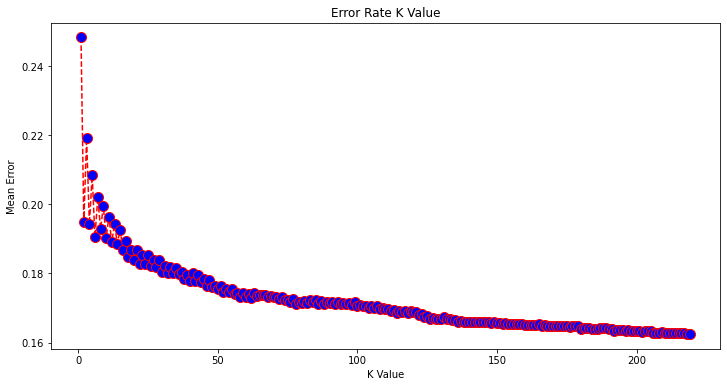

In [129]:
error = []

# Calculating error for K values between 1 and 300
for i in range(1, 220):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 220), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [89]:
classifier = KNeighborsClassifier(n_neighbors=150)
classifier.fit(X_train, y_train)
y_pred1 = classifier.predict(X_test)

## Support Vector Machines

In [90]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.12, 1.1, 11, 101, 1001],  # We are going to tune the SVM parameters using the lectures notes code
              'gamma': [0.9, 0.15, 0.02, 0.002, 0.0002],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# fitting the model for grid search
grid.fit(X_train, y_train)
print('Best Hyperparameters: %s' % grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.12, gamma=0.9, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.12, gamma=0.9, kernel=rbf, score=0.874, total=   0.6s
[CV] C=0.12, gamma=0.9, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ....... C=0.12, gamma=0.9, kernel=rbf, score=0.868, total=   0.6s
[CV] C=0.12, gamma=0.9, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV] ....... C=0.12, gamma=0.9, kernel=rbf, score=0.863, total=   0.6s
[CV] C=0.12, gamma=0.9, kernel=rbf ...................................
[CV] ....... C=0.12, gamma=0.9, kernel=rbf, score=0.864, total=   0.6s
[CV] C=0.12, gamma=0.9, kernel=rbf ...................................
[CV] ....... C=0.12, gamma=0.9, kernel=rbf, score=0.861, total=   0.6s
[CV] C=0.12, gamma=0.15, kernel=rbf ..................................
[CV] ...... C=0.12, gamma=0.15, kernel=rbf, score=0.885, total=   0.5s
[CV] C=0.12, gamma=0.15, kernel=rbf ..................................
[CV] ...... C=0.12, gamma=0.15, kernel=rbf, score=0.882, total=   0.5s
[CV] C=0.12, gamma=0.15, kernel=rbf ..................................
[CV] ...... C=0.12, gamma=0.15, kernel=rbf, score=0.881, total=   0.5s
[CV] C=0.12, gamma=0.15, kernel=rbf ..................................
[CV] ...... C=0.12, gamma=0.15, kernel=rbf, score=0.884, total=   0.5s
[CV] C=0.12, gamma=0.15, kernel=rbf ..................................
[CV] .

[CV] ........ C=11, gamma=0.02, kernel=rbf, score=0.902, total=   0.6s
[CV] C=11, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=11, gamma=0.02, kernel=rbf, score=0.896, total=   0.6s
[CV] C=11, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=11, gamma=0.02, kernel=rbf, score=0.891, total=   0.6s
[CV] C=11, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=11, gamma=0.02, kernel=rbf, score=0.886, total=   0.6s
[CV] C=11, gamma=0.02, kernel=rbf ....................................
[CV] ........ C=11, gamma=0.02, kernel=rbf, score=0.891, total=   0.6s
[CV] C=11, gamma=0.002, kernel=rbf ...................................
[CV] ....... C=11, gamma=0.002, kernel=rbf, score=0.891, total=   0.5s
[CV] C=11, gamma=0.002, kernel=rbf ...................................
[CV] ....... C=11, gamma=0.002, kernel=rbf, score=0.886, total=   0.5s
[CV] C=11, gamma=0.002, kernel=rbf ...................................
[CV] .

[CV] ..... C=1001, gamma=0.002, kernel=rbf, score=0.882, total=   2.1s
[CV] C=1001, gamma=0.002, kernel=rbf .................................
[CV] ..... C=1001, gamma=0.002, kernel=rbf, score=0.888, total=   2.0s
[CV] C=1001, gamma=0.0002, kernel=rbf ................................
[CV] .... C=1001, gamma=0.0002, kernel=rbf, score=0.891, total=   0.9s
[CV] C=1001, gamma=0.0002, kernel=rbf ................................
[CV] .... C=1001, gamma=0.0002, kernel=rbf, score=0.885, total=   0.7s
[CV] C=1001, gamma=0.0002, kernel=rbf ................................
[CV] .... C=1001, gamma=0.0002, kernel=rbf, score=0.881, total=   0.9s
[CV] C=1001, gamma=0.0002, kernel=rbf ................................
[CV] .... C=1001, gamma=0.0002, kernel=rbf, score=0.883, total=   0.8s
[CV] C=1001, gamma=0.0002, kernel=rbf ................................
[CV] .... C=1001, gamma=0.0002, kernel=rbf, score=0.882, total=   0.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  2.8min finished


Best Hyperparameters: {'C': 101, 'gamma': 0.02, 'kernel': 'rbf'}


In [91]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf',C=1001, gamma=0.002 )
svclassifier.fit(X_train, y_train)
y_pred2 = svclassifier.predict(X_test)


## Decision trees

In [92]:
from sklearn.model_selection import RepeatedStratifiedKFold #We are going to tune the DT parameters using the lectures notes
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.datasets import make_moons



# define search space
space = dict(criterion = ['gini', 'entropy'],
         max_depth = randint(1, 11), 
         min_samples_split = randint(2, 15), 
         max_leaf_nodes = randint(5, 30))

# defie DT classification model
model = DecisionTreeClassifier(random_state=42)

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8944501737004561
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 18, 'min_samples_split': 4}


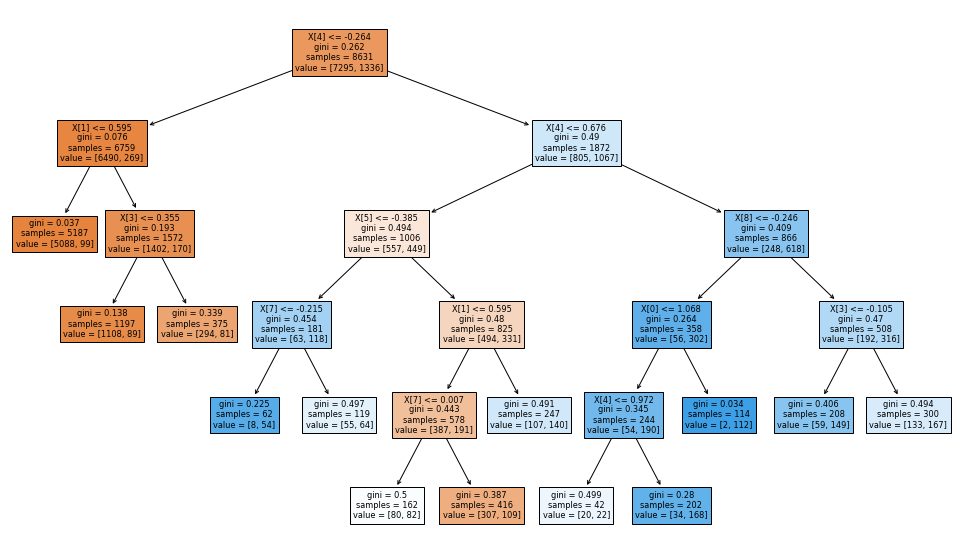

In [93]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(criterion= 'gini', max_depth=9, max_leaf_nodes=13, min_samples_split= 9)
treeclassifier.fit(X_train, y_train)

y_pred3 = treeclassifier.predict(X_test)

plt.figure(figsize=(17,10))  # set plot size (denoted in inches
plot_tree(treeclassifier, filled=True)
plt.show()

# Performance evaluation [10%]:
Organise the data in a suitable form to ensure the trained classifiers to provide
reliable results. Evaluate models using suitable performance metrics.

## K-Neighbors

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred1))


[[3097   30]
 [ 413  159]]


In [95]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

       False       0.88      0.99      0.93      3127
        True       0.84      0.28      0.42       572

    accuracy                           0.88      3699
   macro avg       0.86      0.63      0.68      3699
weighted avg       0.88      0.88      0.85      3699



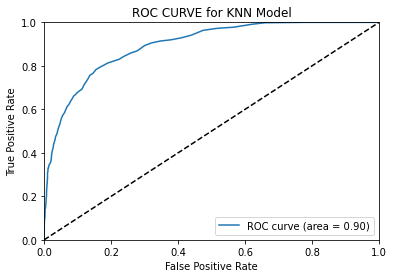

In [96]:
from sklearn.metrics import roc_curve, auc
classifier = KNeighborsClassifier(n_neighbors=150)
prob_1 = classifier.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_1[:, 1])
roc_auc = auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for XXX Model')
plt.legend(loc="lower right")
plt.show()

## Support Vector Machines

In [97]:
print(confusion_matrix(y_test,y_pred2))


[[3046   81]
 [ 288  284]]


In [98]:
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

       False       0.91      0.97      0.94      3127
        True       0.78      0.50      0.61       572

    accuracy                           0.90      3699
   macro avg       0.85      0.74      0.77      3699
weighted avg       0.89      0.90      0.89      3699



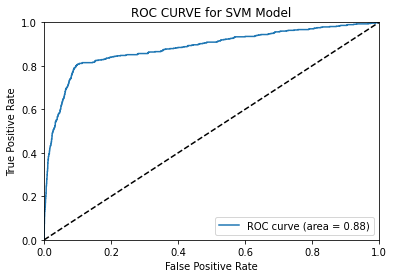

In [99]:
from sklearn.metrics import roc_curve, auc
svclassifier = SVC(kernel='rbf',C=1001, gamma=0.002,probability=True )
prob_2 = svclassifier.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_2[:, 1])
roc_auc = auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for SVM Model')
plt.legend(loc="lower right")
plt.show()

## Decision trees

In [100]:
print(confusion_matrix(y_test,y_pred3))


[[2915  212]
 [ 153  419]]


In [101]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3127
        True       0.66      0.73      0.70       572

    accuracy                           0.90      3699
   macro avg       0.81      0.83      0.82      3699
weighted avg       0.91      0.90      0.90      3699



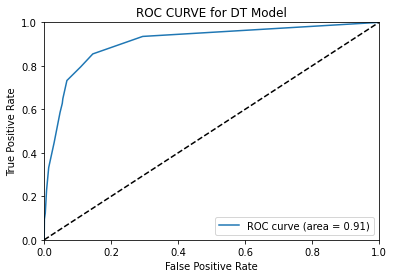

In [102]:
from sklearn.metrics import roc_curve, auc
treeclassifier = DecisionTreeClassifier(criterion= 'gini', max_depth=9, max_leaf_nodes=13, min_samples_split= 9)
prob_3 = treeclassifier.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, prob_3[:, 1])
roc_auc = auc(fpr, tpr)
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE for DT Model')
plt.legend(loc="lower right")
plt.show()

# Result analysis and discussion [10%]:
Provide an insightful analysis and comparison on results that you obtained from
above steps, draw conclusions based on the results and analysis.

In [3]:
def bar(*args):
    return sum(args)
print(bar(4,5,6))

15
